In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-04-24 18:09:14.396806: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 18:09:14.396914: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 18:09:14.626549: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("/kaggle/input/luna-data/dataset.csv")
df.head()

,file,class
0,/kaggle/working/npy_files/1.3.6.1.4.1.14519.5....,1
1,/kaggle/working/npy_files/1.3.6.1.4.1.14519.5....,1
2,/kaggle/working/npy_files/1.3.6.1.4.1.14519.5....,1
3,/kaggle/working/npy_files/1.3.6.1.4.1.14519.5....,1
4,/kaggle/working/npy_files/1.3.6.1.4.1.14519.5....,1


In [4]:
df['class'].value_counts()

class
1    577
0    500
Name: count, dtype: int64

In [5]:
import seaborn as sns

<Axes: xlabel='class', ylabel='count'>

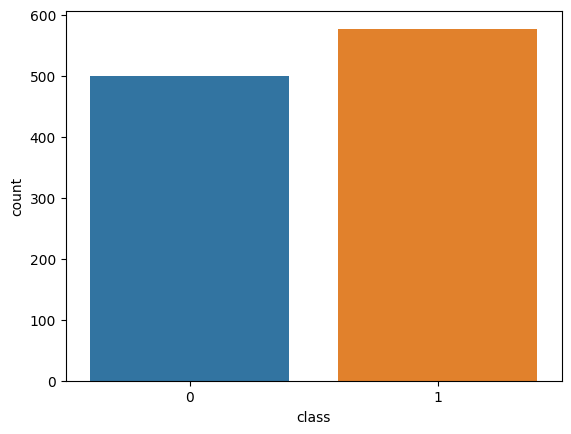

In [6]:
sns.countplot(df,x='class',)

In [7]:
base_path = '/kaggle/input/luna-data/npy_files/'
df['file'] = df['file'].apply(lambda x: base_path + x.split('/')[-1])
X = []  # Images
y = []  # Labels
# Load and preprocess the data
for _, row in df.iterrows():
    volume = np.load(row['file'])
    middle_slice = volume[volume.shape[0] // 2]
    X.append(middle_slice)
    y.append(row['class'])

In [8]:
from tensorflow.keras.utils import to_categorical
X = np.array(X).reshape(-1, middle_slice.shape[0], middle_slice.shape[1], 1)  # Reshape for CNN input
y = to_categorical(y)  # One-hot encode the labels

In [9]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [10]:
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

**SIMPLE CNN**

In [11]:
from tensorflow.keras import layers, models
model_scnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  
    layers.Dense(2, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
lr = 0.0001  
optimizer = Adam(learning_rate=lr)
model_scnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history_scnn = model_scnn.fit(
    data_gen.flow(X_train, y_train, batch_size=32),
    epochs=30,
    validation_data=(X_val, y_val)
)

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 4/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6113 - loss: 105.6348

I0000 00:00:1713982209.010980      88 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713982209.029300      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


15/25 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step - accuracy: 0.5723 - loss: 68.6368

W0000 00:00:1713982212.274903      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.5677 - loss: 52.0363

W0000 00:00:1713982213.157074      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - accuracy: 0.5679 - loss: 50.8806 - val_accuracy: 0.6443 - val_loss: 0.6428
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6083 - loss: 0.6804 - val_accuracy: 0.6701 - val_loss: 0.5803
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6013 - loss: 0.6595 - val_accuracy: 0.6598 - val_loss: 0.5332
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6631 - loss: 0.6366 - val_accuracy: 0.7423 - val_loss: 0.5141
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6628 - loss: 0.6275 - val_accuracy: 0.7835 - val_loss: 0.4702
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7255 - loss: 0.5421 - val_accuracy: 0.7732 - val_loss: 0.4483
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6874 - loss: 0.5594 - val_accuracy: 0.7990 - val_loss: 0.4066
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7314 - loss: 0.5429 - val_accuracy: 0.7887 - val_loss:

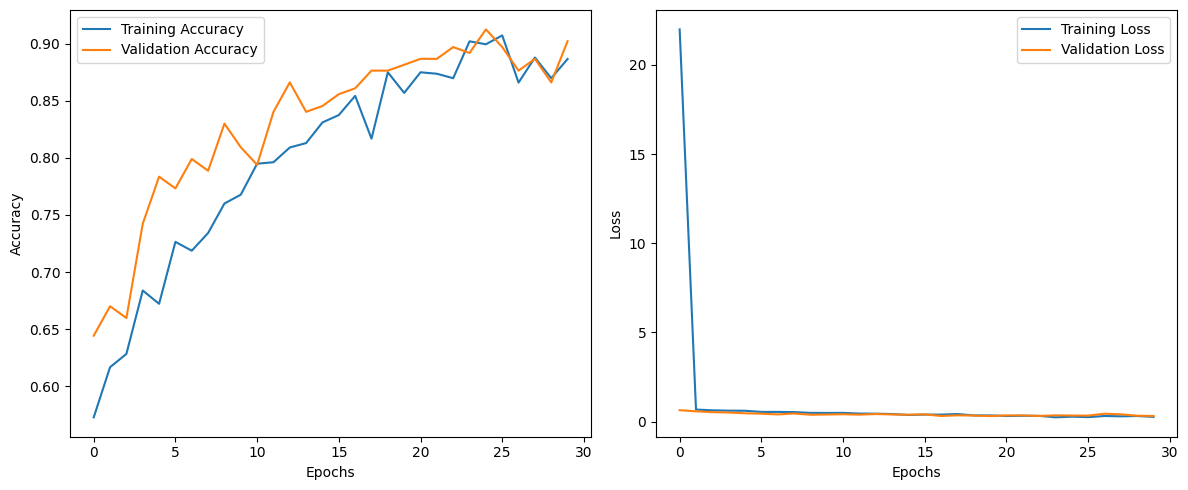

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step - accuracy: 0.9098 - loss: 0.2450
Test accuracy: 0.9074074029922485, Test loss: 0.26972705125808716


W0000 00:00:1713982234.113164      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_scnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_scnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_scnn.history['loss'], label='Training Loss')
plt.plot(history_scnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()
test_loss, test_acc = model_scnn.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 337ms/step

W0000 00:00:1713982234.509879      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


W0000 00:00:1713982234.830547      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


              precision    recall  f1-score   support

           0       0.91      0.91      0.91        56
           1       0.90      0.90      0.90        52

    accuracy                           0.91       108
   macro avg       0.91      0.91      0.91       108
weighted avg       0.91      0.91      0.91       108



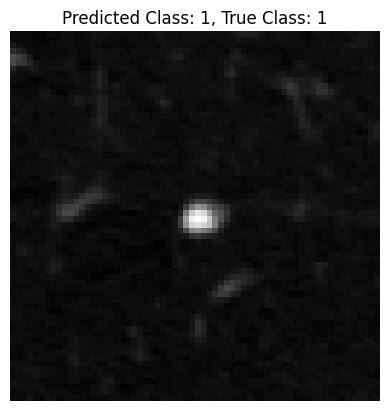

In [15]:
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
# Obtain the model's predictions for the test set
predictions_scnn = model_scnn.predict(X_test)
predicted_classes_scnn = np.argmax(predictions_scnn, axis=1)
true_classes = np.argmax(y_test, axis=1)
# Generate a classification report
print(classification_report(true_classes, predicted_classes_scnn))
# Visualize a sample image, its true label, and predicted class
index_to_visualize = 15  
# Obtain the true label for this index
true_label = true_classes[index_to_visualize]
# Predicted class for this index
predicted_label_scnn = predicted_classes_scnn[index_to_visualize]
# Show the image and the prediction
plt.imshow(X_test[index_to_visualize].squeeze(), cmap='gray')  
plt.title(f"Predicted Class: {predicted_label_scnn}, True Class: {true_label}")
plt.axis('off')
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


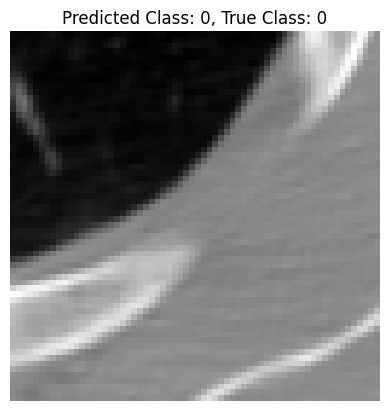

In [16]:
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
predictions_scnn = model_scnn.predict(X_test)
predicted_classes_scnn = np.argmax(predictions_scnn, axis=1)
# The true classes can be obtained by finding the index of the one-hot encoded labels
true_classes = np.argmax(y_test, axis=1)
# Visualize a sample image, its true label, and predicted class
index_to_visualize = 2  
# Obtain the true label for this index
true_label = true_classes[index_to_visualize]
# Predicted class for this index
predicted_label_scnn = predicted_classes_scnn[index_to_visualize]
# Show the image and the prediction
plt.imshow(X_test[index_to_visualize].squeeze(), cmap='gray')  
plt.title(f"Predicted Class: {predicted_label_scnn}, True Class: {true_label}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


W0000 00:00:1713982235.872031      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


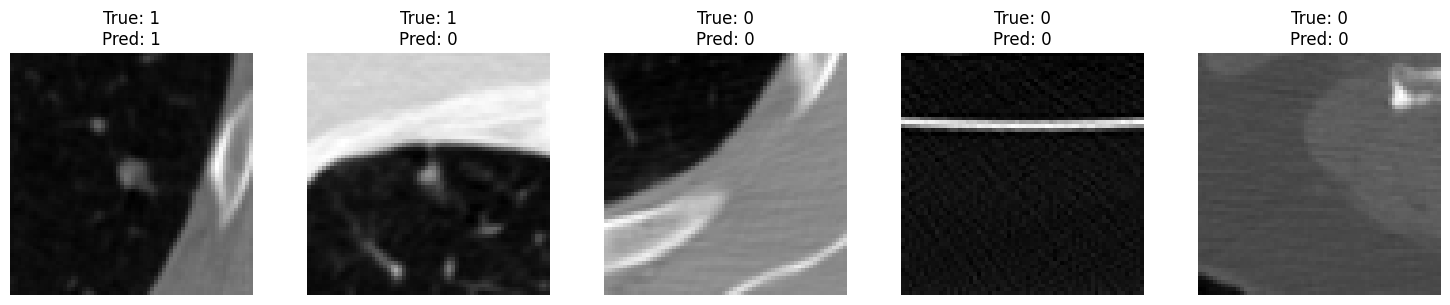

In [17]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
# Get the model's predictions for the first 5 images of the test set
predictions_scnn = model_scnn.predict(X_test[:5])
predicted_classes_scnn = np.argmax(predictions_scnn, axis=1)
# Get the true classes for these images
true_classes = np.argmax(y_test[:5], axis=1)
# Visualize the 5 images with their true and predicted classes
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].squeeze(), cmap='gray')  
    ax.axis('off')  # Hide the axes ticks
    ax.set_title(f"True: {true_classes[i]}\nPred: {predicted_classes_scnn[i]}", fontsize=12)

plt.tight_layout()
plt.show()


**VGG16**

In [18]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [19]:

df = pd.read_csv('/kaggle/input/luna-data/dataset.csv')
base_path = '/kaggle/input/luna-data/npy_files/'
df['file'] = df['file'].apply(lambda x: base_path + x.split('/')[-1])

# Function to load the data and convert grayscale images to 3-channel
def load_data(df):
    A = []  
    b = []  
    for _, row in df.iterrows():
        file_path = row['file']
        volume = np.load(file_path)
        middle_slice = volume[volume.shape[0] // 2]
        middle_slice_3ch = np.repeat(middle_slice[:, :, np.newaxis], repeats=3, axis=2)  # Convert to 3 channels
        A.append(middle_slice_3ch)
        b.append(row['class'])
    A = np.array(A)
    b = to_categorical(np.array(b)) 
    return A, b
A, b = load_data(df)
A_train_val, A_test, b_train_val, b_test = train_test_split(A, b, test_size=0.1, random_state=42)
A_train, A_val, b_train, b_val = train_test_split(A_train_val, b_train_val, test_size=0.2, random_state=42)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 5/25 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6158 - loss: 20.1443

W0000 00:00:1713982245.563296      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.6109 - loss: 18.7674

W0000 00:00:1713982250.037028      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 291ms/step - accuracy: 0.6125 - loss: 18.5560 - val_accuracy: 0.5876 - val_loss: 16.0780
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.6928 - loss: 9.5589 - val_accuracy: 0.6392 - val_loss: 12.8569
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6912 - loss: 11.9814 - val_accuracy: 0.6546 - val_loss: 10.8387
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.7342 - loss: 8.5367 - val_accuracy: 0.6804 - val_loss: 9.5081
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.7567 - loss: 6.3685 - val_accuracy: 0.6959 - val_loss: 8.7169
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.7634 - loss: 7.1213 - val_accuracy: 0.6959 - val_loss: 8.2263
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7734 - loss: 5.1133 - val_accuracy: 0.7268 - val_loss: 8.2489
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.7453 - loss: 6.0031 - val_accuracy: 0.7371 - val_l

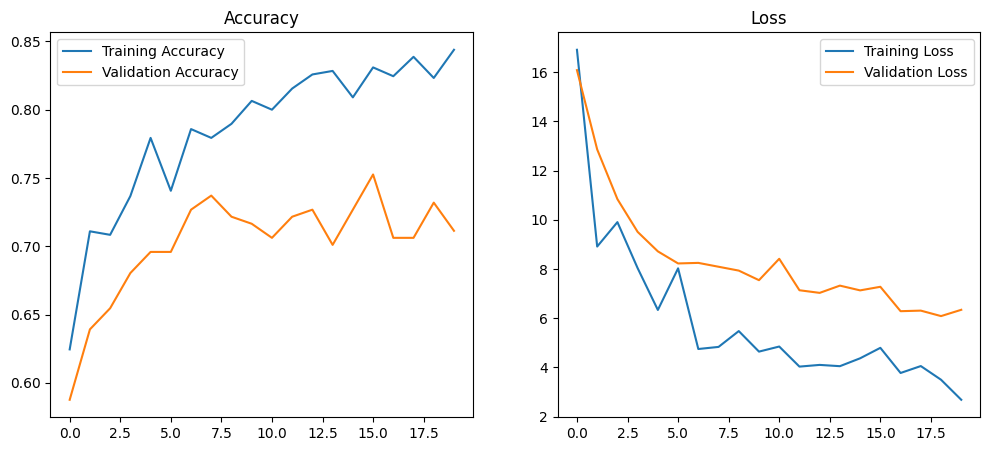

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 926ms/step - accuracy: 0.7839 - loss: 6.6269
VGG16 Model - Test accuracy: 0.7592592835426331, Test loss: 7.654971122741699


In [20]:
from tensorflow.keras.layers import GlobalAveragePooling2D
# Define the VGG16 base model
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
# Freeze the layers of the base model
vgg16_base.trainable = False
# Create a new top model for classification
x = vgg16_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  
vgg16_model = Model(inputs=vgg16_base.input, outputs=predictions)
# Compile the model
vgg16_model.compile(optimizer=Adam(learning_rate=0.0001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(A_train)
# Early stopping and checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('vgg16_best_model.keras', save_best_only=True, monitor='val_loss')
# Fit the model with data augmentation
history = vgg16_model.fit(
    datagen.flow(A_train, b_train, batch_size=32),
    validation_data=(A_val, b_val),
    epochs=20,  
    callbacks=[early_stopping, checkpoint]
)
# Plotting the training & validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()
# Load the best model and evaluate on the test set
vgg16_model.load_weights('vgg16_best_model.keras')
test_loss, test_acc = vgg16_model.evaluate(A_test, b_test)
# Print the test accuracy and loss
print(f"VGG16 Model - Test accuracy: {test_acc}, Test loss: {test_loss}")

**RESNET-50**

In [21]:
import numpy as np
import pandas as pd
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/50
 1/25 ━━━━━━━━━━━━━━━━━━━━ 4:47 12s/step - accuracy: 0.8571 - loss: 2.2168

W0000 00:00:1713982301.337873      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 6/25 ━━━━━━━━━━━━━━━━━━━━ 18s 976ms/step - accuracy: 0.5639 - loss: 11.3376

W0000 00:00:1713982306.059687      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.5647 - loss: 9.2787

W0000 00:00:1713982310.906519      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713982314.337813      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 580ms/step - accuracy: 0.5669 - loss: 9.1672 - val_accuracy: 0.6753 - val_loss: 2.3390
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.7380 - loss: 1.9787 - val_accuracy: 0.6186 - val_loss: 1.3544
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.7273 - loss: 0.9151 - val_accuracy: 0.7629 - val_loss: 0.8452
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7550 - loss: 1.0100 - val_accuracy: 0.5000 - val_loss: 3.5358
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7009 - loss: 2.2510 - val_accuracy: 0.7113 - val_loss: 1.4356
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.7635 - loss: 1.3159 - val_accuracy: 0.7835 - val_loss: 0.8431
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.8084 - loss: 0.6838 - val_accuracy: 0.7526 - val_loss: 0.7453
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.7875 - loss: 0.7028 - val_accuracy: 0.7165 - val_loss: 

W0000 00:00:1713982377.665379      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test accuracy: 0.7962962985038757, Test loss: 0.4112810492515564
1/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step

W0000 00:00:1713982381.434210      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step


W0000 00:00:1713982385.379013      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


              precision    recall  f1-score   support

           0       0.95      0.64      0.77        56
           1       0.71      0.96      0.82        52

    accuracy                           0.80       108
   macro avg       0.83      0.80      0.79       108
weighted avg       0.84      0.80      0.79       108



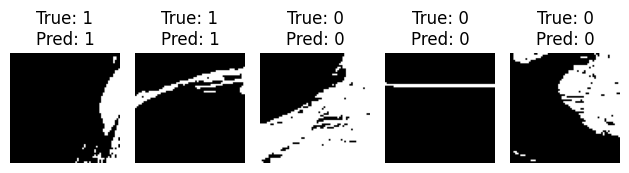

In [22]:
# Define a ResNet50 model
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
resnet_base.trainable = False  
# Create a new model on top
resnet_model = Sequential([
    resnet_base,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')  
])
# Compile the model
resnet_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])
# Early stopping and checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(A_train)
# Train the model
history = resnet_model.fit(
    datagen.flow(A_train, b_train, batch_size=32),
    validation_data=(A_val, b_val),
    epochs=50,
    callbacks=[early_stopping, checkpoint]
)
resnet_model.load_weights('best_model.keras')
test_loss, test_acc = resnet_model.evaluate(A_test, b_test)
# Print the test accuracy and loss
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')
# Classification report
predictions = resnet_model.predict(A_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(b_test, axis=1)
print(classification_report(true_classes, predicted_classes))
# Visualize predictions
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(A_test[i].squeeze(), cmap='gray')
    plt.title(f"True: {true_classes[i]}\nPred: {predicted_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


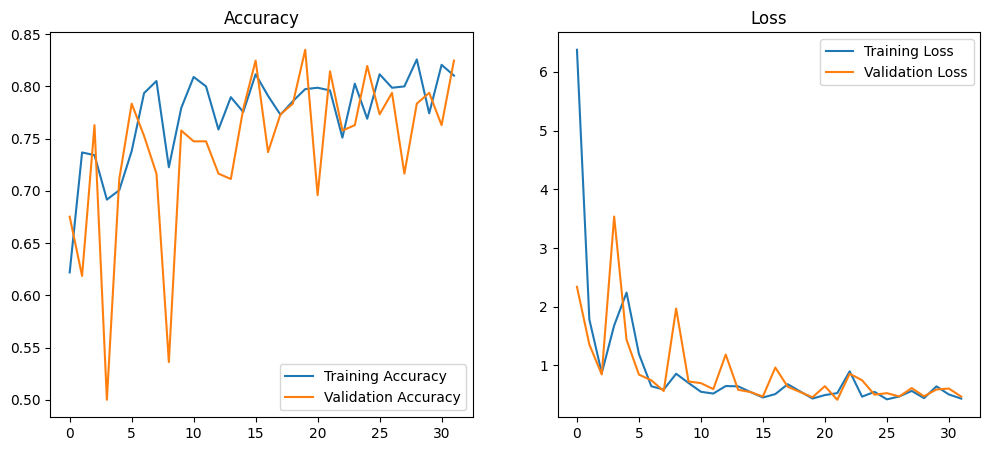

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7789 - loss: 0.4829
Test accuracy: 0.7962962985038757, Test loss: 0.4112810492515564


In [23]:
# Plotting the training & validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = resnet_model.evaluate(A_test, b_test)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")

**IMAGE-NET**

In [24]:
X_train_rgb = np.repeat(X_train, 3, axis=-1)
X_val_rgb = np.repeat(X_val, 3, axis=-1)
X_test_rgb = np.repeat(X_test, 3, axis=-1)
# Load VGG16 pre-trained on ImageNet data
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(X_train_rgb.shape[1], X_train_rgb.shape[2], 3))
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False
# Create new model on top
model_imagenet = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  
])

# Compile the model
model_imagenet.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history_imagenet = model_imagenet.fit(X_train_rgb, y_train, epochs=30, validation_data=(X_val_rgb, y_val))
# Evaluate the model
test_loss, test_acc = model_imagenet.evaluate(X_test_rgb, y_test)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")


Epoch 1/30
10/25 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5466 - loss: 31.2588

W0000 00:00:1713982398.849774      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.5713 - loss: 21.6219

W0000 00:00:1713982403.094401      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713982406.969654      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 420ms/step - accuracy: 0.5730 - loss: 21.2334 - val_accuracy: 0.7371 - val_loss: 1.3476
Epoch 2/30
 7/25 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7044 - loss: 2.5697

W0000 00:00:1713982408.926761      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7276 - loss: 1.6382 - val_accuracy: 0.7887 - val_loss: 0.4659
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7579 - loss: 0.5549 - val_accuracy: 0.7990 - val_loss: 0.4617
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7809 - loss: 0.4548 - val_accuracy: 0.7732 - val_loss: 0.4746
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8143 - loss: 0.4051 - val_accuracy: 0.7938 - val_loss: 0.4324
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8087 - loss: 0.4223 - val_accuracy: 0.7835 - val_loss: 0.4151
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8199 - loss: 0.4058 - val_accuracy: 0.7887 - val_loss: 0.4146
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8258 - loss: 0.3614 - val_accuracy: 0.8196 - val_loss: 0.3791
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8374 - loss: 0.3520 - val_accuracy: 0.7887 - val_loss: 0.

W0000 00:00:1713982423.735075      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


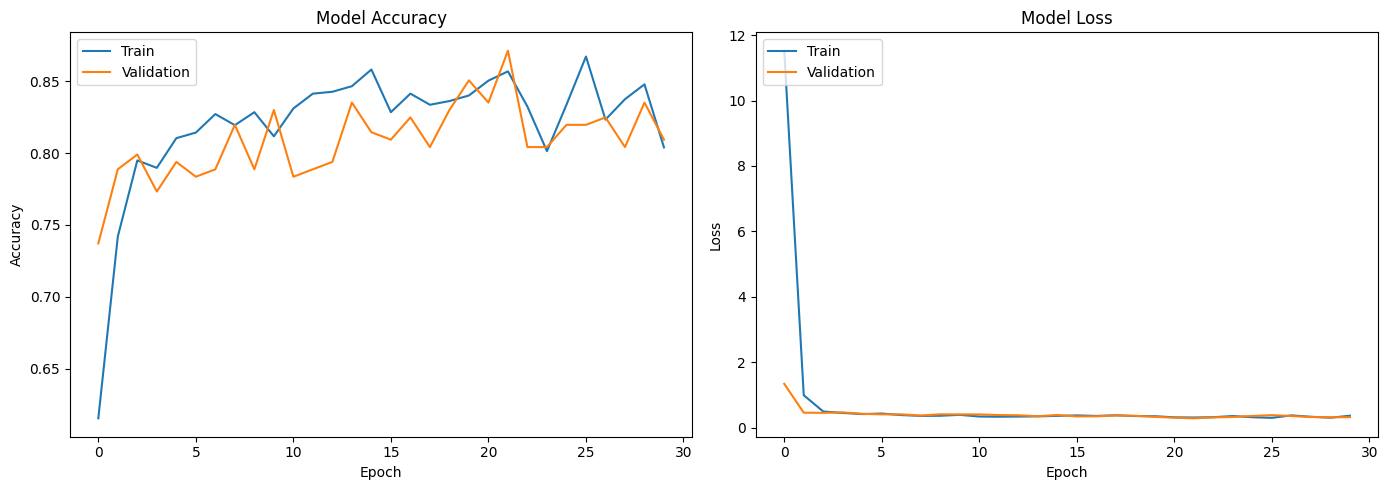

In [25]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history_imagenet.history['accuracy'], label='Train')
plt.plot(history_imagenet.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_imagenet.history['loss'], label='Train')
plt.plot(history_imagenet.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


1/4 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step

W0000 00:00:1713982428.038356      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step
              precision    recall  f1-score   support

           0       0.96      0.80      0.87        56
           1       0.82      0.96      0.88        52

    accuracy                           0.88       108
   macro avg       0.89      0.88      0.88       108
weighted avg       0.89      0.88      0.88       108



W0000 00:00:1713982432.135105      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


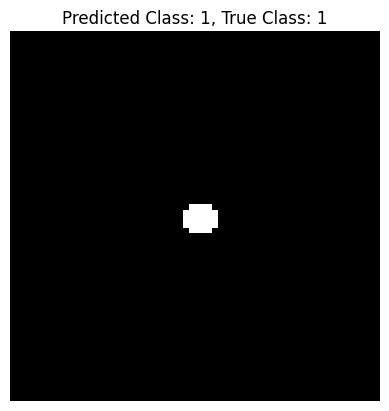

In [26]:
predictions_imagenet = model_imagenet.predict(X_test_rgb)
predicted_classes_imagenet = np.argmax(predictions_imagenet, axis=1)
true_classes = np.argmax(y_test, axis=1)

print(classification_report(true_classes, predicted_classes_imagenet))
# Visualize a sample image, its true label, and predicted class
index_to_visualize = 15 
# Obtain the true label for this index
true_label = true_classes[index_to_visualize]
# Predicted class for this index
predicted_label_imagenet = predicted_classes_imagenet[index_to_visualize]
# Show the image and the prediction
plt.imshow(X_test_rgb[index_to_visualize].squeeze(), cmap='gray')  
plt.title(f"Predicted Class: {predicted_label_imagenet}, True Class: {true_label}")
plt.axis('off')
plt.show()


**MODEL FINAL**

In [27]:
model_fcnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  
    layers.Dense(2, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [28]:
custom_lr = 0.001  
optimizer_final = Adam(learning_rate=custom_lr)
model_fcnn.compile(optimizer=optimizer_final, loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
history_fcnn = model_fcnn.fit(
    data_gen.flow(X_train, y_train, batch_size=32),
    epochs=30,
    validation_data=(X_val, y_val)
)

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5646 - loss: 77.7713

W0000 00:00:1713982435.969715      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.5582 - loss: 57.5555

W0000 00:00:1713982438.373629      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713982438.860446      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.5568 - loss: 51.5407 - val_accuracy: 0.6959 - val_loss: 0.6913
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5699 - loss: 1.1465 - val_accuracy: 0.7010 - val_loss: 0.5496
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6644 - loss: 0.6534 - val_accuracy: 0.6907 - val_loss: 0.5625
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6466 - loss: 0.5969 - val_accuracy: 0.7423 - val_loss: 0.5767
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6687 - loss: 0.6783 - val_accuracy: 0.6598 - val_loss: 0.5558
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6902 - loss: 0.6068 - val_accuracy: 0.7423 - val_loss: 0.5214
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7207 - loss: 0.5654 - val_accuracy: 0.6959 - val_loss: 0.5091
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7315 - loss: 0.5983 - val_accuracy: 0.7423 - val_loss: 

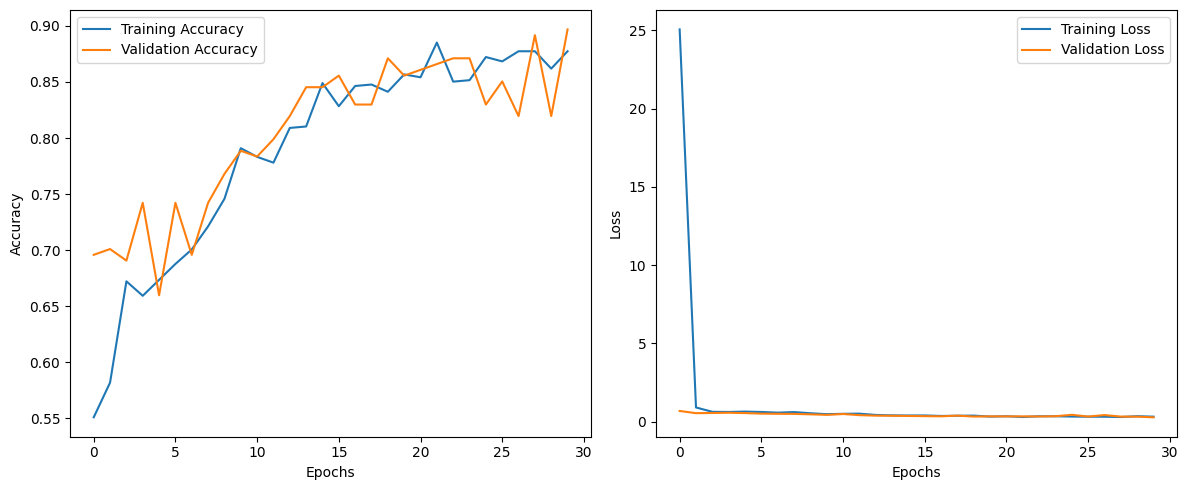

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9412 - loss: 0.2274
Test accuracy: 0.9259259104728699, Test loss: 0.24768075346946716


W0000 00:00:1713982458.567535      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [30]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_fcnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_fcnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_fcnn.history['loss'], label='Training Loss')
plt.plot(history_fcnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

test_loss, test_acc = model_fcnn.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step

W0000 00:00:1713982458.956272      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step
              precision    recall  f1-score   support

           0       0.96      0.89      0.93        56
           1       0.89      0.96      0.93        52

    accuracy                           0.93       108
   macro avg       0.93      0.93      0.93       108
weighted avg       0.93      0.93      0.93       108



W0000 00:00:1713982459.272864      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


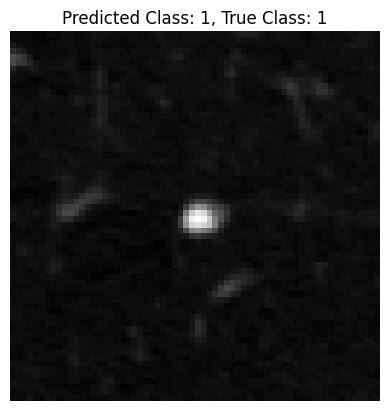

In [31]:
predictions_fcnn = model_fcnn.predict(X_test)
predicted_classes_fcnn = np.argmax(predictions_fcnn, axis=1)
true_classes = np.argmax(y_test, axis=1)
# Generate a classification report
print(classification_report(true_classes, predicted_classes_fcnn))
# Visualize a sample image, its true label, and predicted class
index_to_visualize = 15  
# Obtain the true label for this index
true_label = true_classes[index_to_visualize]
# Predicted class for this index
predicted_label_fcnn = predicted_classes_fcnn[index_to_visualize]
# Show the image and the prediction
plt.imshow(X_test[index_to_visualize].squeeze(), cmap='gray')  
plt.title(f"Predicted Class: {predicted_label_fcnn}, True Class: {true_label}")
plt.axis('off')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


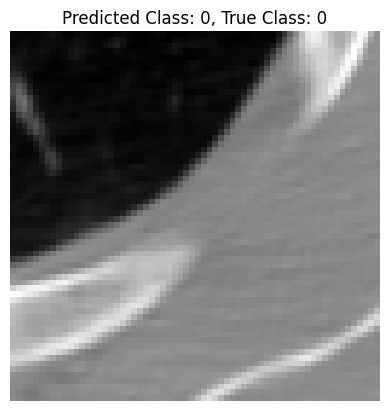

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


W0000 00:00:1713982459.876254      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


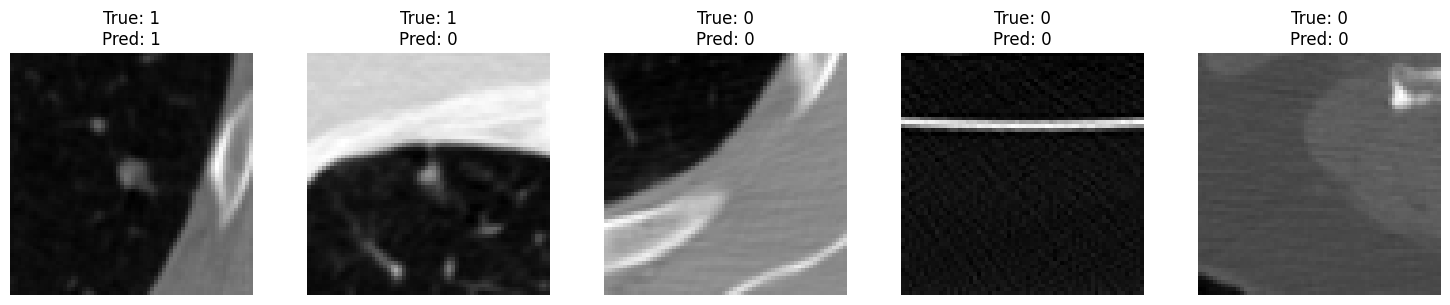

In [32]:
predictions_fcnn = model_fcnn.predict(X_test)
predicted_classes_fcnn = np.argmax(predictions_fcnn, axis=1)
true_classes = np.argmax(y_test, axis=1)
# Visualize a sample image, its true label, and predicted class
index_to_visualize = 2  
# Obtain the true label for this index
true_label = true_classes[index_to_visualize]
# Predicted class for this index
predicted_label_fcnn = predicted_classes_fcnn[index_to_visualize]
# Show the image and the prediction
plt.imshow(X_test[index_to_visualize].squeeze(), cmap='gray')  # Squeeze to remove channel dimension for visualization
plt.title(f"Predicted Class: {predicted_label_fcnn}, True Class: {true_label}")
plt.axis('off')
plt.show()
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
# Get the model's predictions for the first 5 images of the test set
predictions_fcnn = model_fcnn.predict(X_test[:5])
predicted_classes_fcnn = np.argmax(predictions_fcnn, axis=1)
# Get the true classes for these images
true_classes = np.argmax(y_test[:5], axis=1)
# Visualize the 5 images with their true and predicted classes
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].squeeze(), cmap='gray')  
    ax.axis('off')  # Hide the axes ticks
    ax.set_title(f"True: {true_classes[i]}\nPred: {predicted_classes_fcnn[i]}", fontsize=12)

plt.tight_layout()
plt.show()
